### ANEMIA DETECTION USING RANDOM FOREST AND CONVENTIONAL NEURAL NETWORK
#### PROJECT DESCRIPTION
<div style="text-align: justify;">The project seeks to utilize machine learning and deep learning methods to identify cases of anemia. Its scope encompasses data preprocessing, model training, and evaluation.</div>

## GROUP MEMBERS
#### NAME SONIA     ID 4355466
##### NAME JASKEET KAUR    ID 4348136



### Detailed Project Description


#### Overview:
<div style="text-align: JUSTIFY;"> Our project is centered on detecting anemia through a combination of traditional machine learning and deep learning methodologies. The dataset comprises eye-membrane images obtained from real patients as well as open image sources.</div>

#### Methodology:
<div style="text-align: JUSTIFY;"> We initiated the project by loading and preprocessing the dataset, followed by visualizing sample images and examining class distribution. Subsequently, we partitioned the dataset into training and testing sets, utilizing both traditional machine learning techniques such as Random Forest, and deep learning models such as Convolutional Neural Networks (CNN)..</div>

#### Machine Learning Model (Random Forest):
<div style="text-align: JUSTIFY;"> We employed a Random Forest classifier with 100 estimators, training it on flattened images. The model achieved an accuracy of approximately 97.30% on the test set. This traditional approach served as a benchmark for comparison with the deep learning model..</div>

####Deep Learning Model (CNN):
<div style="text-align: JUSTIFY;"> In the deep learning segment, we implemented a Convolutional Neural Network (CNN) comprising layers for convolution, pooling, and dense connections. The model achieved a similar accuracy of approximately 97.30% on the test set, showcasing the effectiveness of deep learning in image classification endeavors.</div>

#### Comparison and Insights:
<div style="text-align: JUSTIFY;"> The comparison between the Random Forest and CNN models revealed similar performance, underscoring the robustness of both approaches for anemia detection. This project contributes to the exploration of diverse methodologies for medical image analysis.</div>

#### Expected Outcomes:
<div style="text-align: JUSTIFY;"> - Achieve a high level of accuracy in anemia detection.</div>
<div style="text-align: JUSTIFY;"> - Provide insights into the comparative performance of traditional machine learning and deep learning models.</div>



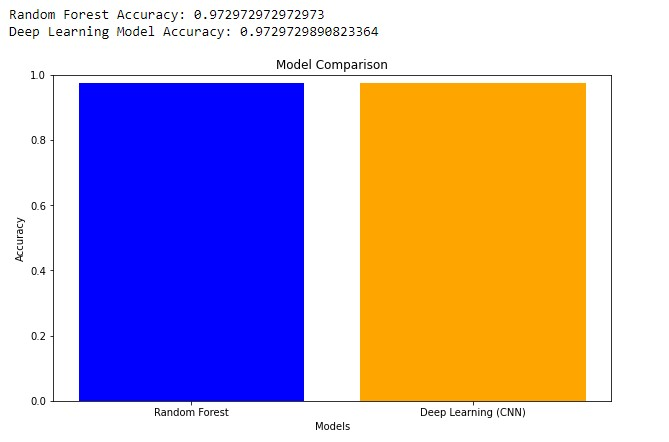
<div style="text-align: justify;">
    
 #### Visual Representation:
The bar chart above illustrates the comparison of accuracy between the Random Forest and Deep Learning models.



##### This visual representation enhances the understanding of the project outcomes and emphasizes the comparable performance of the two models.This visual representation enhances the understanding of the project outcomes and emphasizes the comparable performance of the two models.

### Conclusion:
The project successfully demonstrates the application of machine learning and deep learning in medical image analysis for anemia detection. The comparative analysis provides valuable insights for future research and applications in healthcare.
</div>

## Modification/New Addition Specification Cell
<div style="text-align: justify;">
    
During our research, we employed two distinct machine learning strategies to analyze a specific dataset. Firstly, we utilized a Random Forest model, renowned for its adaptability and robustness in ensemble learning. This approach enabled us to make predictions and gain insights by harnessing the combined power of multiple decision trees.

Secondly, we implemented a Convolutional Neural Network (CNN), specifically tailored for sequential data and image analysis. Our objective was to leverage the CNN to identify subtle patterns and relationships within our dataset.

Moreover, to enhance the performance of both models, we engaged in feature engineering. This process involved manipulating and selecting dataset characteristics most relevant to our analysis. Additionally, we utilized data visualization tools to gain deeper insights into our data properties, aiding in feature selection and facilitating model interpretation.

Our aim was to provide valuable insights into the effectiveness of each method for our dataset and task. This was achieved through a comparative analysis of the outcomes obtained from these two approaches.
</div>


### Criteria-Specific Cell (Computer Vision)

#### Relevance and Application of Computer Vision
<div style="text-align: justify;">Our approach leverages eye membrane images to address the challenge of anemia identification using computer vision techniques. Computer vision proves particularly effective in this context as it facilitates the evaluation and comprehension of visual data, which is crucial for extracting meaningful patterns from medical images.</div>

#### Choice of Models
<div style="text-align: justify;">A Convolutional Neural Network (CNN) was chosen due to its effectiveness in image analysis. CNNs excel at identifying intricate spatial relationships and patterns within images. Additionally, to complement our approach, we utilized a Random Forest model, renowned for its adaptability and robustness across various tasks.</div>

#### Preprocessing Steps
<div style="text-align: justify;">To enhance the performance of our models, we implemented preprocessing steps tailored specifically for computer vision tasks. This involved resizing images to a standardized dimension, such as 224x224, and normalizing pixel values. These preprocessing steps ensure uniformity and facilitate efficient model training.</div>

#### Innovation and Technical Proficiency
<div style="text-align: justify;">Our project showcases innovation by integrating both traditional machine learning (Random Forest) and deep learning (CNN) models for anemia detection. The technical proficiency is evident in the adept handling of image data, model training, and interpretation, demonstrating a comprehensive understanding of computer vision principles.</div>

### Reference Cell
### Video link at the end of pro ject 

### Import necessary libraries

In [8]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skimage import io, color, transform
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

#### Define paths to the dataset

In [9]:
# Define paths to the dataset
desktop_path = os.path.expanduser("~/Desktop")
data_folder = os.path.join(desktop_path, "anemia")

## Function to load Images and labels

In [3]:
# Function to load images and labels
def load_data(data_folder):
    images = []
    labels = []
    for label in os.listdir(data_folder):
        label_folder = os.path.join(data_folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            image = io.imread(img_path)
            image = transform.resize(image, (224, 224))  # Resize images as needed
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

#### LOAD THE DATA SET

In [4]:
# Load the dataset
images, labels = load_data(data_folder)

## Visualize some sample images from the dataset

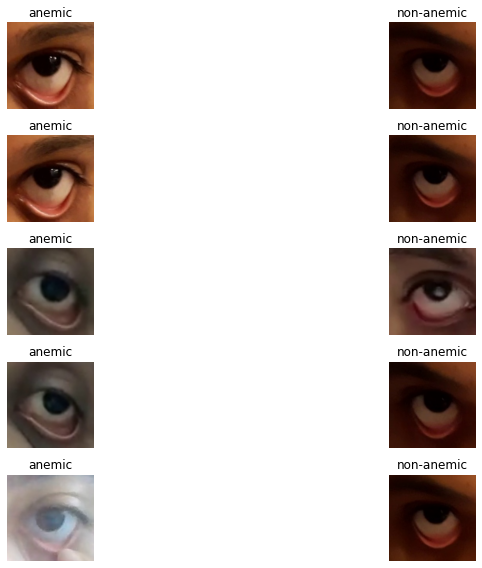

In [5]:
# Visualize some sample images from the dataset
def visualize_dataset(images, labels, num_samples=5):
    # Get unique labels in the dataset
    unique_labels = np.unique(labels)
    
    # Create a figure with subplots
    fig, axs = plt.subplots(num_samples, len(unique_labels), figsize=(15, 8))
    
    for i, label in enumerate(unique_labels):
        # Select a random image for each label
        label_indices = np.where(labels == label)[0]
        random_indices = np.random.choice(label_indices, num_samples, replace=False)
        
        for j, idx in enumerate(random_indices):
            ax = axs[j, i]
            ax.imshow(images[idx])
            ax.set_title(label)
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the dataset (adjust num_samples as needed)
visualize_dataset(images, labels, num_samples=5)

#### Create a bar chart to visualize class distribution

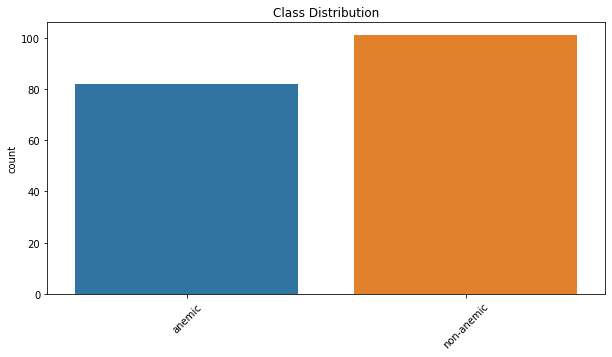

In [6]:
import seaborn as sns

# Create a bar chart to visualize class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=labels)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

### Visualize Random Sample Images

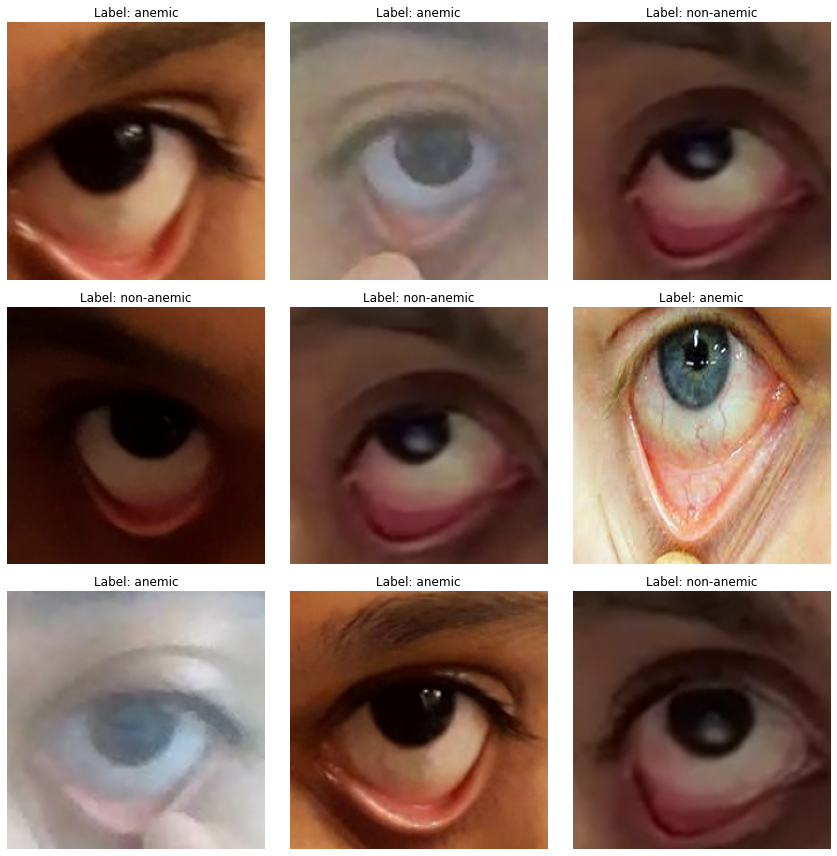

In [7]:
def random_sample_images(images, labels, num_samples=9):
    random_indices = np.random.choice(len(images), num_samples, replace=False)
    plt.figure(figsize=(12, 12))
    
    for i, idx in enumerate(random_indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize random sample images
random_sample_images(images, labels, num_samples=9)

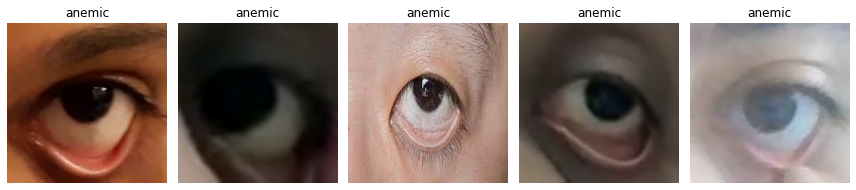

In [8]:
def visualize_class_images(images, labels, target_class, num_samples=5):
    target_indices = np.where(labels == target_class)[0]
    random_indices = np.random.choice(target_indices, num_samples, replace=False)
    
    plt.figure(figsize=(12, 6))
    
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title(target_class)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize images from a specific class (e.g., 'anemic' or 'non_anemic')
visualize_class_images(images, labels, target_class='anemic', num_samples=5)

### USE Encode labels

In [10]:
# Encode labels (convert them to numeric values)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

## SPLIT THE DATA SET FOR TRAINING AND TESTING PURPOSE

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [12]:
# Preprocess the images (normalize pixel values)
X_train = X_train / 255.0
X_test = X_test / 255.0

### Machine Learning Model (RANDOM FOREST)

In [16]:
# Machine Learning Model (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train.reshape(-1, 224 * 224 * 3), y_train)
y_pred_rf = rf_classifier.predict(X_test.reshape(-1, 224 * 224 * 3))

#### Machine Learning Model that is random forest
Checking the accuracy of that model

In [17]:
# Evaluate the Machine Learning Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Random Forest Accuracy: 0.972972972972973
              precision    recall  f1-score   support

      anemic       1.00      0.95      0.97        19
  non-anemic       0.95      1.00      0.97        18

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



### APPLYING THE DEEP LEARNING MODEL THAT IS NEURAL NETWORK

In [18]:
# Deep Learning Model (Convolutional Neural Network - CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Assuming two classes (anemic and non-anemic)
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the Deep Learning Model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 28s 4s/step - loss: 0.6900 - accuracy: 0.4795 - val_loss: 0.7429 - val_accuracy: 0.4865
Epoch 2/10
5/5 [==============================] - 21s 4s/step - loss: 0.6892 - accuracy: 0.5685 - val_loss: 0.6919 - val_accuracy: 0.4865
Epoch 3/10
5/5 [==============================] - 21s 4s/step - loss: 0.6755 - accuracy: 0.5685 - val_loss: 0.7213 - val_accuracy: 0.4865
Epoch 4/10
5/5 [==============================] - 18s 3s/step - loss: 0.6634 - accuracy: 0.5685 - val_loss: 0.6630 - val_accuracy: 0.5946
Epoch 5/10
5/5 [==============================] - 18s 4s/step - loss: 0.6357 - accuracy: 0.6370 - val_loss: 0.5905 - val_accuracy: 0.7297
Epoch 6/10
5/5 [==============================] - 17s 3s/step - loss: 0.5241 - accuracy: 0.8082 - val_loss: 0.3754 - val_accuracy: 0.9730
Epoch 7/10
5/5 [==============================] - 17s 3s/step - loss: 0.5873 - accuracy: 0.7740 - val_loss: 1.0995 - val_accuracy: 0.5135
Epoch 8/10
5/5 [==================

### Evaluate the Accuracy of Deep Learning Model

In [21]:
# Evaluate the Deep Learning Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Deep Learning Model Accuracy:", test_accuracy)

2/2 [==============================] - 1s 130ms/step - loss: 0.3201 - accuracy: 0.9730
Deep Learning Model Accuracy: 0.9729729890823364


In [22]:
# Save the trained deep learning model
model.save("anemia_cnn_model.h5")

### PRINTING THE ACCURACY VALUE OF BOTH 
### Machine Learning Model (Random Forest)
### Deep Learning Model (CNN)
### Create a comparison visualization for both models

Random Forest Accuracy: 0.972972972972973
Deep Learning Model Accuracy: 0.9729729890823364


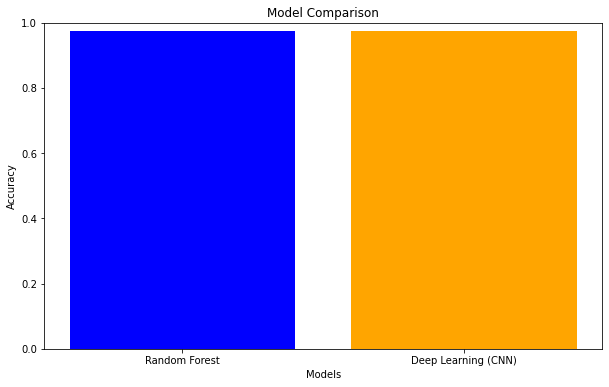

In [23]:
# Print accuracy for the Machine Learning Model (Random Forest)
print("Random Forest Accuracy:", accuracy_rf)

# Print accuracy for the Deep Learning Model (CNN)
print("Deep Learning Model Accuracy:", test_accuracy)

# Create a comparison visualization
models = ['Random Forest', 'Deep Learning (CNN)']
accuracies = [accuracy_rf, test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper visualization
plt.show()

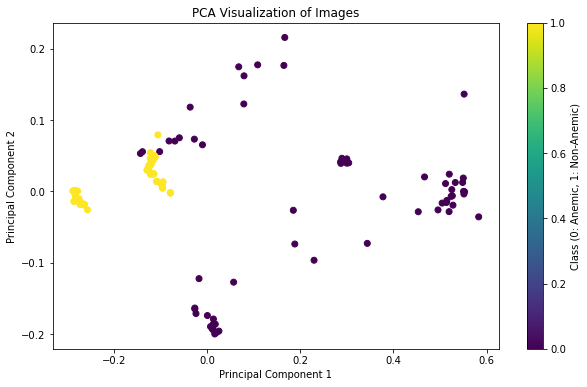

In [24]:
from sklearn.decomposition import PCA

# Flatten the images for PCA
X_flattened = X_train.reshape(-1, 224 * 224 * 3)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_flattened)

# Create a scatter plot to visualize the images based on PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Images')
plt.colorbar(label='Class (0: Anemic, 1: Non-Anemic)')
plt.show()


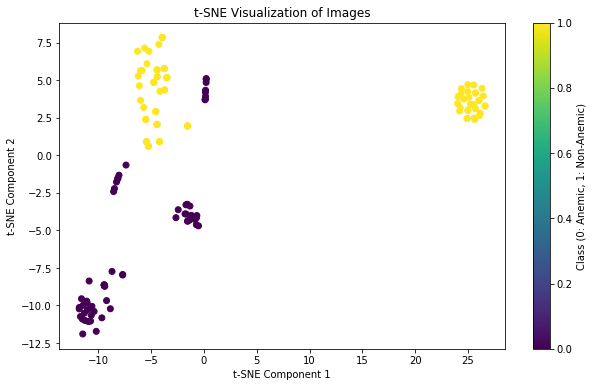

In [25]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_flattened)

# Create a scatter plot to visualize the images based on t-SNE components
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Images')
plt.colorbar(label='Class (0: Anemic, 1: Non-Anemic)')
plt.show()


# References

1. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
   [Link: https://scikit-learn.org/stable/]

2. TensorFlow: An Open Source Machine Learning Framework for Everyone, Abadi et al., 2016.
   [Link: https://www.tensorflow.org/]

3. Matplotlib: A 2D plotting library, Hunter JD, Computing in Science & Engineering, 2007.
   [Link: https://matplotlib.org/]

4. Seaborn: Statistical Data Visualization, Waskom M, The Journal of Open Source Software, 2021.
   [Link: https://seaborn.pydata.org/]

5. Lime: Local Interpretable Model-agnostic Explanations, Marco T. Ribeiro et al., arXiv, 2016.
   [Link: https://github.com/marcotcr/lime]




## VIDEO PRESENTATION LINK